In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import plotly.graph_objects as go
import pickle

In [2]:
MA_AP_all_data = pd.read_excel('../data/Massachusetts/AP_data_combined_18_22.xlsx', sheet_name='2022-23')

In [3]:
MA_AP_all_data.columns

Index(['COUNTY', 'District Code', 'Year', 'Tests Taken', 'PERCENT_3_OR_ABOVE',
       'population', 'per_capita_income', 'closest_five_r1r2_avg',
       'closest_five_avg_enrollment_r1r2', 'closest_five_avg_dormrooms_r1r2',
       'closest_five_public_avg', 'closest_five_avg_enrollment_public',
       'closest_five_avg_dormrooms_public', 'closest_five_private_nfp_avg',
       'closest_five_avg_enrollment_private_nfp',
       'closest_five_avg_dormrooms_private_nfp', 'closest_five_landgrnt_avg',
       'closest_five_avg_enrollment_landgrnt',
       'closest_five_avg_dormrooms_landgrant', 'closest_five_stem_avg',
       'closest_five_avg_enrollment_stem', 'closest_five_avg_dormrooms_stem'],
      dtype='object')

# Feature 1: 2022-23: AP Score 3-5 vs. Per Capita Income

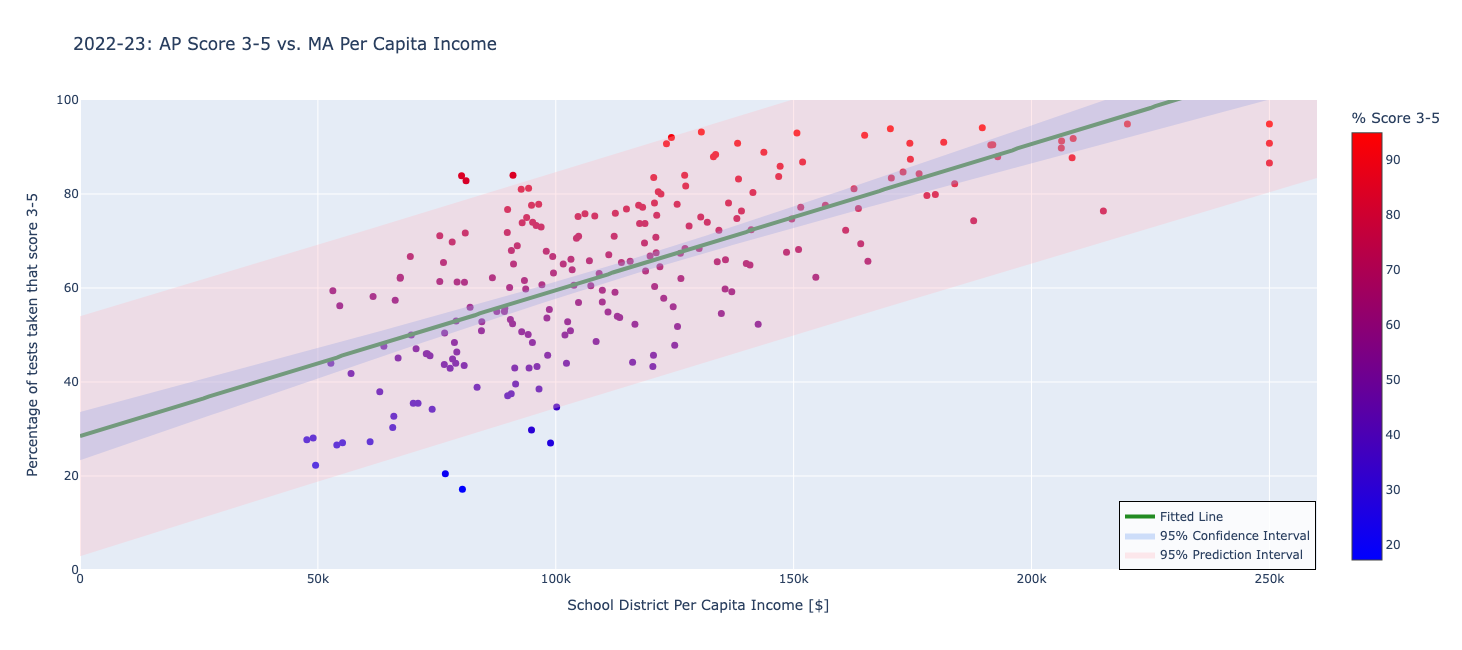

In [4]:
x_arr = MA_AP_all_data['per_capita_income'].to_numpy()
y_arr = MA_AP_all_data['PERCENT_3_OR_ABOVE'].to_numpy()

# Fit the OLS model
alpha = 0.05  # 95% confidence level
x_with_const = sm.add_constant(x_arr)  # Add intercept
model = sm.OLS(y_arr, x_with_const).fit()

# Generate x values for the fitted line
x_line = np.linspace(0, 260e3, 261)
x_line_rounded = np.round(x_line, decimals=-1)
x_line_with_const = sm.add_constant(x_line_rounded)

# Get predictions and intervals
predictions = model.get_prediction(x_line_with_const)
prediction_summary = predictions.summary_frame(alpha=alpha)

# Extract values
y_line = prediction_summary['mean'].values
ci_lower = prediction_summary['mean_ci_lower'].values  # Confidence Interval lower bound
ci_upper = prediction_summary['mean_ci_upper'].values  # Confidence Interval upper bound
pi_lower = prediction_summary['obs_ci_lower'].values  # Prediction Interval lower bound
pi_upper = prediction_summary['obs_ci_upper'].values  # Prediction Interval upper bound

# Round fitted values for consistency
y_line = np.round(y_line, decimals=1)


#### Draw the data points ####
fig = go.Figure(data=go.Scatter(
    x=np.round(x_arr, decimals=-1),
    y=np.round(y_arr, decimals=1),
    mode='markers',
    marker=dict(
        size=7,
        color=y_arr,
        colorscale='Bluered',
        symbol='circle',
        showscale=True,
        colorbar=dict(title='% Score 3-5'),
    ),
    showlegend=False,
    text=MA_AP_all_data['COUNTY'],
    name=''
))

#### Add the fitted line ####
fig.add_trace(go.Scatter(
    x=x_line_rounded,
    y=y_line,
    mode="lines",
    line=dict(color="forestgreen", width=4),
    name="Fitted Line",
    showlegend=True
))

#### Add the Confidence Interval band ####
fig.add_trace(go.Scatter(
    x=np.concatenate([x_line_rounded, x_line_rounded[::-1]]),
    y=np.concatenate([ci_upper, ci_lower[::-1]]),
    fill='toself',
    fillcolor='rgba(100, 149, 237, 0.3)',
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo="skip",
    showlegend=True,
    name="95% Confidence Interval"
))

#### Add the Prediction Interval band ####
fig.add_trace(go.Scatter(
    x=np.concatenate([x_line_rounded, x_line_rounded[::-1]]),
    y=np.concatenate([pi_upper, pi_lower[::-1]]),
    fill='toself',
    fillcolor='rgba(255, 182, 193, 0.3)',
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo="skip",
    showlegend=True,
    name="95% Prediction Interval"
))

#### Write the title of the plot ####
fig.update_layout(
    title='2022-23: AP Score 3-5 vs. MA Per Capita Income',
    xaxis_title='School District Per Capita Income [$]',
    yaxis_title='Percentage of tests taken that score 3-5',
    width=650,
    height=650,
    legend=dict(
        x=1.0,  # Position of the legend (x-coordinate in normalized units)
        y=0.0,  # Position of the legend (y-coordinate in normalized units)
        xanchor='right',  # Align the legend box to the right
        yanchor='bottom',  # Align the legend box to the bottom
        bgcolor='rgba(255, 255, 255, 0.8)',  # White background with some transparency
        bordercolor='black',
        borderwidth=1
    )
)

fig.update_xaxes(range=[0, 260e3])
fig.update_yaxes(range=[0, 100])
fig.show()

# Save the plot
with open('../data/MA_pickled/MA_pass_vs_school_district_income.pkl', 'wb') as f:
    pickle.dump(fig, f)

# Feature 2: 2022-23: AP Score 3-5 vs. District Population

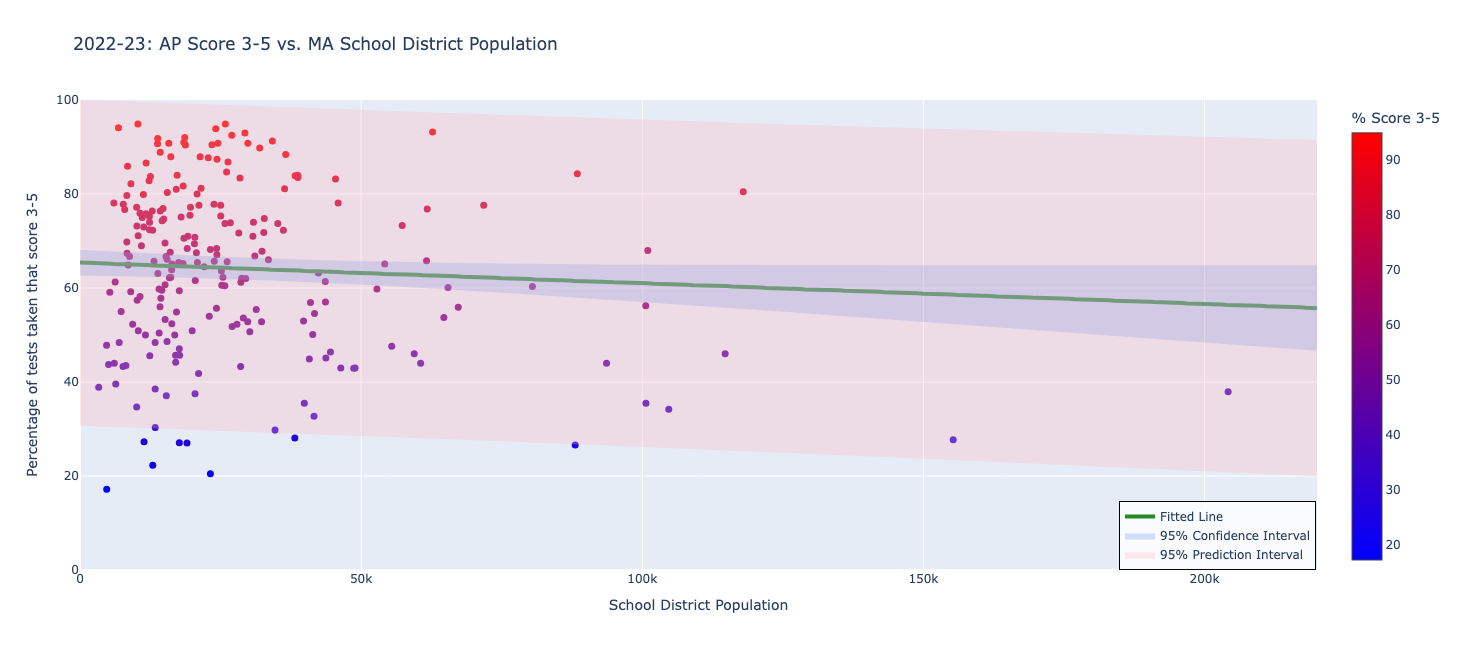

In [5]:
x_arr = MA_AP_all_data['population'].to_numpy()
y_arr = MA_AP_all_data['PERCENT_3_OR_ABOVE'].to_numpy()

# Fit the OLS model
alpha = 0.05  # 95% confidence level
x_with_const = sm.add_constant(x_arr)  # Add intercept
model = sm.OLS(y_arr, x_with_const).fit()

# Generate x values for the fitted line
x_line = np.linspace(0, 220e3, 221)
x_line = np.round(x_line, decimals=-1)
x_line_with_const = sm.add_constant(x_line)

# Get predictions and intervals
predictions = model.get_prediction(x_line_with_const)
prediction_summary = predictions.summary_frame(alpha=alpha)

# Extract values
y_line = prediction_summary['mean'].values
ci_lower = prediction_summary['mean_ci_lower'].values  # Confidence Interval lower bound
ci_upper = prediction_summary['mean_ci_upper'].values  # Confidence Interval upper bound
pi_lower = prediction_summary['obs_ci_lower'].values  # Prediction Interval lower bound
pi_upper = prediction_summary['obs_ci_upper'].values  # Prediction Interval upper bound

# Round fitted values for consistency
y_line = np.round(y_line, decimals=1)

#### Draw the data points ####
fig = go.Figure(data=go.Scatter(
    x=np.round(x_arr, decimals=-1),
    y=np.round(y_arr, decimals=1),
    mode='markers',
    marker=dict(
        size=7,
        color=y_arr,
        colorscale='Bluered',
        symbol='circle',
        showscale=True,
        colorbar=dict(title='% Score 3-5'),
    ),
    showlegend=False,
    text=MA_AP_all_data['COUNTY'],
    name=''
))

#### Add the fitted line ####
fig.add_trace(go.Scatter(
    x=x_line,
    y=y_line,
    mode="lines",
    line=dict(color="forestgreen", width=4),  # Thicker fitted line
    name="Fitted Line",
    showlegend=True
))

#### Add the Confidence Interval band ####
fig.add_trace(go.Scatter(
    x=np.concatenate([x_line, x_line[::-1]]),
    y=np.concatenate([ci_upper, ci_lower[::-1]]),
    fill='toself',
    fillcolor='rgba(100, 149, 237, 0.3)',
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo="skip",
    showlegend=True,
    name="95% Confidence Interval"
))

#### Add the Prediction Interval band ####
fig.add_trace(go.Scatter(
    x=np.concatenate([x_line, x_line[::-1]]),
    y=np.concatenate([pi_upper, pi_lower[::-1]]),
    fill='toself',
    fillcolor='rgba(255, 182, 193, 0.3)',
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo="skip",
    showlegend=True,
    name="95% Prediction Interval"
))

#### Write the title of the plot ####
fig.update_layout(
    title='2022-23: AP Score 3-5 vs. MA School District Population',
    xaxis_title='School District Population',
    yaxis_title='Percentage of tests taken that score 3-5',
    width=650,
    height=650,
    legend=dict(
        x=1.0,  # Position of the legend (x-coordinate in normalized units)
        y=0.0,  # Position of the legend (y-coordinate in normalized units)
        xanchor='right',  # Align the legend box to the right
        yanchor='bottom',  # Align the legend box to the bottom
        bgcolor='rgba(255, 255, 255, 0.8)',  # White background with some transparency
        bordercolor='black',
        borderwidth=1
    )
)

fig.update_xaxes(range=[0, 220e3])
fig.update_yaxes(range=[0, 100])
fig.show()

# Save the plot
with open('../data/MA_pickled/MA_pass_vs_school_district_population.pkl', 'wb') as f:
    pickle.dump(fig, f)

# Feature 3: Average distance to 5 closest public universities

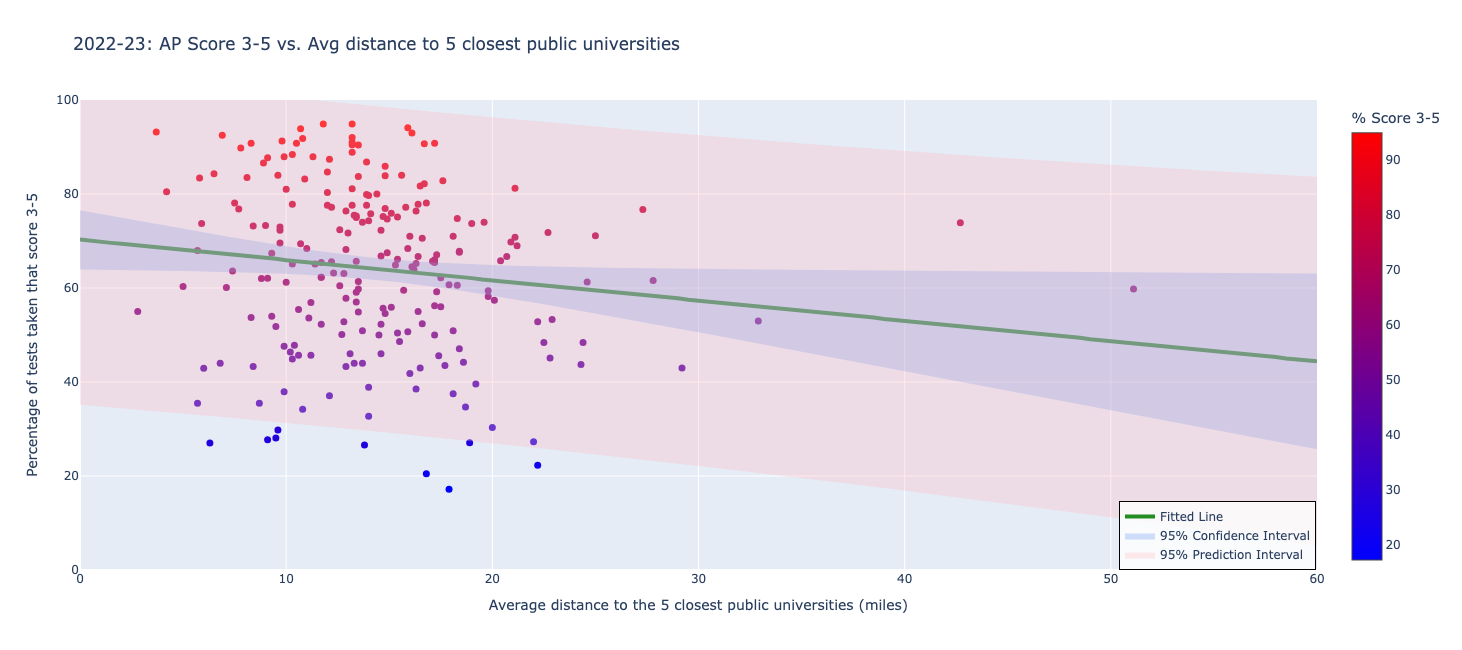

In [6]:
x_arr = MA_AP_all_data['closest_five_public_avg'].to_numpy()
y_arr = MA_AP_all_data['PERCENT_3_OR_ABOVE'].to_numpy()

# Fit the OLS model
alpha = 0.05  # 95% confidence level
x_with_const = sm.add_constant(x_arr)  # Add intercept
model = sm.OLS(y_arr, x_with_const).fit()

# Generate x values for the fitted line
x_line = np.linspace(0, 60, 121)
x_line = np.round(x_line, decimals = 1)
x_line_with_const = sm.add_constant(x_line)

# Get predictions and intervals
predictions = model.get_prediction(x_line_with_const)
prediction_summary = predictions.summary_frame(alpha=alpha)

# Extract values
y_line = prediction_summary['mean'].values
ci_lower = prediction_summary['mean_ci_lower'].values  # Confidence Interval lower bound
ci_upper = prediction_summary['mean_ci_upper'].values  # Confidence Interval upper bound
pi_lower = prediction_summary['obs_ci_lower'].values  # Prediction Interval lower bound
pi_upper = prediction_summary['obs_ci_upper'].values  # Prediction Interval upper bound

# Round fitted values for consistency
y_line = np.round(y_line, decimals=1)

#### Draw the data points ####
fig = go.Figure(data=go.Scatter(
    x=np.round(x_arr, decimals=1),
    y=np.round(y_arr, decimals=1),
    mode='markers',
    marker=dict(
        size=7,
        color=y_arr,
        colorscale='Bluered',
        symbol='circle',
        showscale=True,
        colorbar=dict(title='% Score 3-5'),
    ),
    showlegend=False,
    text=MA_AP_all_data['COUNTY'],
    name=''
))

#### Add the fitted line ####
fig.add_trace(go.Scatter(
    x=x_line,
    y=y_line,
    mode="lines",
    line=dict(color="forestgreen", width=4),  # Thicker fitted line
    name="Fitted Line",
    showlegend=True
))

#### Add the Confidence Interval band ####
fig.add_trace(go.Scatter(
    x=np.concatenate([x_line, x_line[::-1]]),
    y=np.concatenate([ci_upper, ci_lower[::-1]]),
    fill='toself',
    fillcolor='rgba(100, 149, 237, 0.3)',
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo="skip",
    showlegend=True,
    name="95% Confidence Interval"
))

#### Add the Prediction Interval band ####
fig.add_trace(go.Scatter(
    x=np.concatenate([x_line, x_line[::-1]]),
    y=np.concatenate([pi_upper, pi_lower[::-1]]),
    fill='toself',
    fillcolor='rgba(255, 182, 193, 0.3)',
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo="skip",
    showlegend=True,
    name="95% Prediction Interval"
))

#### Write the title of the plot ####
fig.update_layout(
    title='2022-23: AP Score 3-5 vs. Avg distance to 5 closest public universities',
    xaxis_title='Average distance to the 5 closest public universities (miles)',
    yaxis_title='Percentage of tests taken that score 3-5',
    width=650,
    height=650,
    legend=dict(
        x=1.0,  # Position of the legend (x-coordinate in normalized units)
        y=0.0,  # Position of the legend (y-coordinate in normalized units)
        xanchor='right',  # Align the legend box to the right
        yanchor='bottom',  # Align the legend box to the bottom
        bgcolor='rgba(255, 255, 255, 0.8)',  # White background with some transparency
        bordercolor='black',
        borderwidth=1
    )
)

fig.update_xaxes(range=[0, 60])
fig.update_yaxes(range=[0, 100])
fig.show()

# Save the plot
with open('../data/MA_pickled/MA_pass_vs_closest_five_public_avg.pkl', 'wb') as f:
    pickle.dump(fig, f)

# Feature 4: 2022-23: AP Score 3-5 vs. avg distance to 5 closest private university

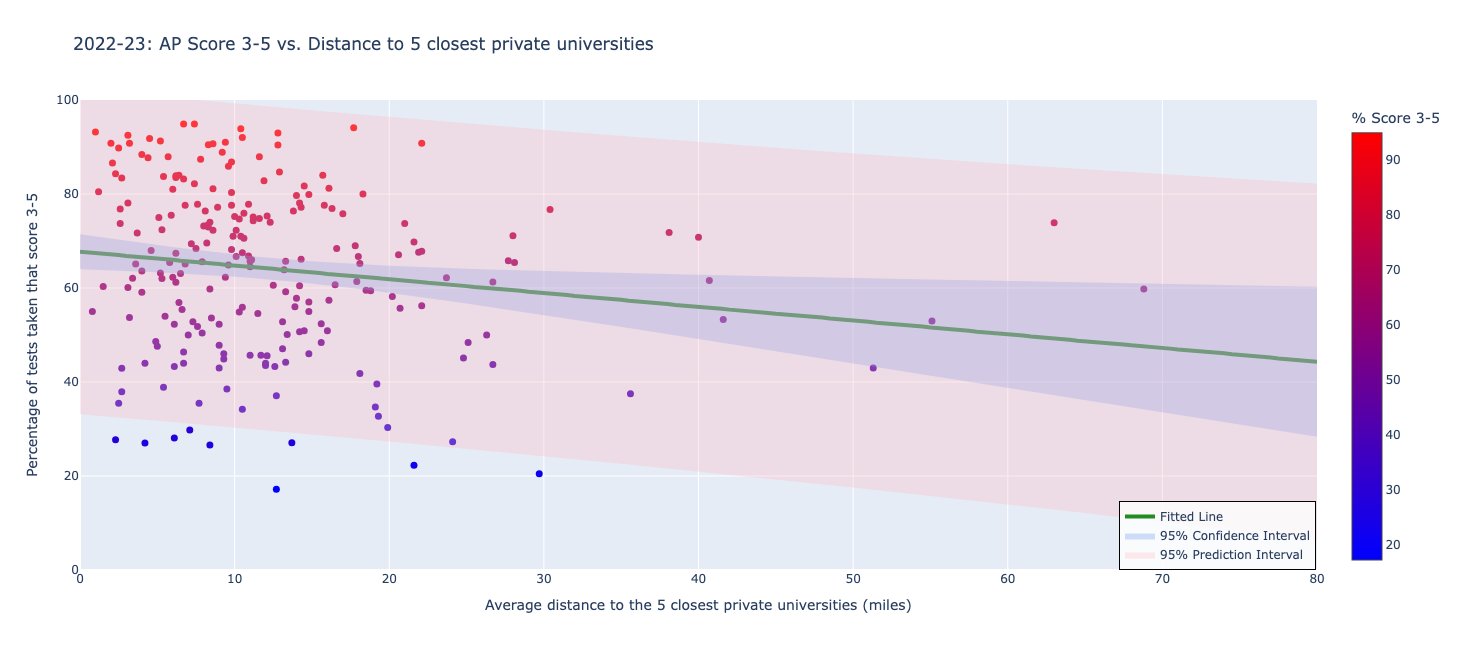

In [7]:
x_arr = MA_AP_all_data['closest_five_private_nfp_avg'].to_numpy()
y_arr = MA_AP_all_data['PERCENT_3_OR_ABOVE'].to_numpy()

# Fit the OLS model
alpha = 0.05  # 95% confidence level
x_with_const = sm.add_constant(x_arr)  # Add intercept
model = sm.OLS(y_arr, x_with_const).fit()

# Generate x values for the fitted line
x_line = np.linspace(0, 80, 161)
x_line = np.round(x_line, decimals = 1)
x_line_with_const = sm.add_constant(x_line)

# Get predictions and intervals
predictions = model.get_prediction(x_line_with_const)
prediction_summary = predictions.summary_frame(alpha=alpha)

# Extract values
y_line = prediction_summary['mean'].values
ci_lower = prediction_summary['mean_ci_lower'].values  # Confidence Interval lower bound
ci_upper = prediction_summary['mean_ci_upper'].values  # Confidence Interval upper bound
pi_lower = prediction_summary['obs_ci_lower'].values  # Prediction Interval lower bound
pi_upper = prediction_summary['obs_ci_upper'].values  # Prediction Interval upper bound

# Round fitted values for consistency
y_line = np.round(y_line, decimals=1)

#### Draw the data points ####
fig = go.Figure(data=go.Scatter(
    x=np.round(x_arr, decimals=1),
    y=np.round(y_arr, decimals=1),
    mode='markers',
    marker=dict(
        size=7,
        color=y_arr,
        colorscale='Bluered',
        symbol='circle',
        showscale=True,
        colorbar=dict(title='% Score 3-5'),
    ),
    showlegend=False,
    text=MA_AP_all_data['COUNTY'],
    name=''
))

#### Add the fitted line ####
fig.add_trace(go.Scatter(
    x=x_line,
    y=y_line,
    mode="lines",
    line=dict(color="forestgreen", width=4),  # Thicker fitted line
    name="Fitted Line",
    showlegend=True
))

#### Add the Confidence Interval band ####
fig.add_trace(go.Scatter(
    x=np.concatenate([x_line, x_line[::-1]]),
    y=np.concatenate([ci_upper, ci_lower[::-1]]),
    fill='toself',
    fillcolor='rgba(100, 149, 237, 0.3)',
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo="skip",
    showlegend=True,
    name="95% Confidence Interval"
))

#### Add the Prediction Interval band ####
fig.add_trace(go.Scatter(
    x=np.concatenate([x_line, x_line[::-1]]),
    y=np.concatenate([pi_upper, pi_lower[::-1]]),
    fill='toself',
    fillcolor='rgba(255, 182, 193, 0.3)',
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo="skip",
    showlegend=True,
    name="95% Prediction Interval"
))

#### Write the title of the plot ####
fig.update_layout(
    title='2022-23: AP Score 3-5 vs. Distance to 5 closest private universities',
    xaxis_title='Average distance to the 5 closest private universities (miles)',
    yaxis_title='Percentage of tests taken that score 3-5',
    width=650,
    height=650,
    legend=dict(
        x=1.0,  # Position of the legend (x-coordinate in normalized units)
        y=0.0,  # Position of the legend (y-coordinate in normalized units)
        xanchor='right',  # Align the legend box to the right
        yanchor='bottom',  # Align the legend box to the bottom
        bgcolor='rgba(255, 255, 255, 0.8)',  # White background with some transparency
        bordercolor='black',
        borderwidth=1
    )
)

fig.update_xaxes(range=[0, 80])
fig.update_yaxes(range=[0, 100])
fig.show()

# Save the plot
with open('../data/MA_pickled/MA_pass_vs_closest_five_private_nfp_avg.pkl', 'wb') as f:
    pickle.dump(fig, f)

# Feature 5: Average enrollment in the five closest land grant universities

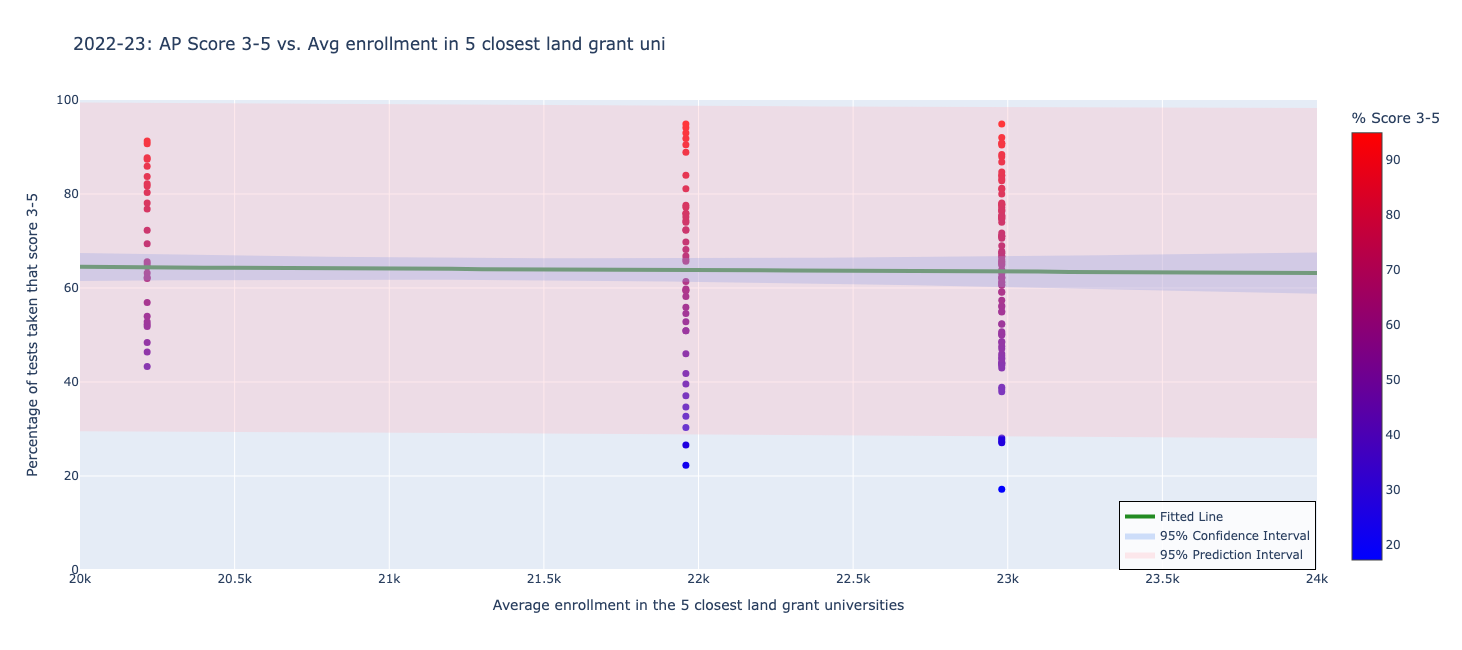

In [8]:
x_arr = MA_AP_all_data['closest_five_avg_enrollment_landgrnt'].to_numpy()
y_arr = MA_AP_all_data['PERCENT_3_OR_ABOVE'].to_numpy()

# Fit the OLS model
alpha = 0.05  # 95% confidence level
x_with_const = sm.add_constant(x_arr)  # Add intercept
model = sm.OLS(y_arr, x_with_const).fit()

# Generate x values for the fitted line
x_line = np.linspace(20e3, 24e3, 41)
x_line = np.round(x_line, decimals = 1)
x_line_with_const = sm.add_constant(x_line)

# Get predictions and intervals
predictions = model.get_prediction(x_line_with_const)
prediction_summary = predictions.summary_frame(alpha=alpha)

# Extract values
y_line = prediction_summary['mean'].values
ci_lower = prediction_summary['mean_ci_lower'].values  # Confidence Interval lower bound
ci_upper = prediction_summary['mean_ci_upper'].values  # Confidence Interval upper bound
pi_lower = prediction_summary['obs_ci_lower'].values  # Prediction Interval lower bound
pi_upper = prediction_summary['obs_ci_upper'].values  # Prediction Interval upper bound

# Round fitted values for consistency
y_line = np.round(y_line, decimals = 1)

#### Draw the data points ####
fig = go.Figure(data=go.Scatter(
    x=np.round(x_arr, decimals = 2),
    y=np.round(y_arr, decimals = 1),
    mode='markers',
    marker=dict(
        size=7,
        color=y_arr,
        colorscale='Bluered',
        symbol='circle',
        showscale=True,
        colorbar=dict(title='% Score 3-5'),
    ),
    showlegend=False,
    text=MA_AP_all_data['COUNTY'],
    name=''
))

#### Add the fitted line ####
fig.add_trace(go.Scatter(
    x=x_line,
    y=y_line,
    mode="lines",
    line=dict(color="forestgreen", width=4),  # Thicker fitted line
    name="Fitted Line",
    showlegend=True
))

#### Add the Confidence Interval band ####
fig.add_trace(go.Scatter(
    x=np.concatenate([x_line, x_line[::-1]]),
    y=np.concatenate([ci_upper, ci_lower[::-1]]),
    fill='toself',
    fillcolor='rgba(100, 149, 237, 0.3)',
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo="skip",
    showlegend=True,
    name="95% Confidence Interval"
))

#### Add the Prediction Interval band ####
fig.add_trace(go.Scatter(
    x=np.concatenate([x_line, x_line[::-1]]),
    y=np.concatenate([pi_upper, pi_lower[::-1]]),
    fill='toself',
    fillcolor='rgba(255, 182, 193, 0.3)',
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo="skip",
    showlegend=True,
    name="95% Prediction Interval"
))

#### Write the title of the plot ####
fig.update_layout(
    title='2022-23: AP Score 3-5 vs. Avg enrollment in 5 closest land grant uni',
    xaxis_title='Average enrollment in the 5 closest land grant universities',
    yaxis_title='Percentage of tests taken that score 3-5',
    width=650,
    height=650,
    legend=dict(
        x=1.0,  # Position of the legend (x-coordinate in normalized units)
        y=0.0,  # Position of the legend (y-coordinate in normalized units)
        xanchor='right',  # Align the legend box to the right
        yanchor='bottom',  # Align the legend box to the bottom
        bgcolor='rgba(255, 255, 255, 0.8)',  # White background with some transparency
        bordercolor='black',
        borderwidth=1
    )
)

fig.update_xaxes(range=[20e3, 24e3])
fig.update_yaxes(range=[0, 100])
fig.show()

# Save the plot
with open('../data/MA_pickled/MA_pass_vs_closest_five_avg_enrollment_landgrnt.pkl', 'wb') as f:
    pickle.dump(fig, f)